# Basic data visualization

In [1]:
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot

In [2]:
src = rasterio.open(r"../tests/data/RGB.byte.tif")

### With a raster dataset,  (band number) or numpy array we can display the raster

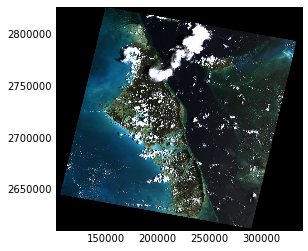

In [3]:
%matplotlib inline
plot.show(src)

### We can also display a single band of a multiband image by passing a tuple (raster source, band)

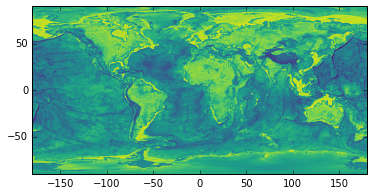

In [4]:
world = rasterio.open(r"../tests/data/world.rgb.tif")
plot.show((world, 2), cmap='viridis')

### side by side:

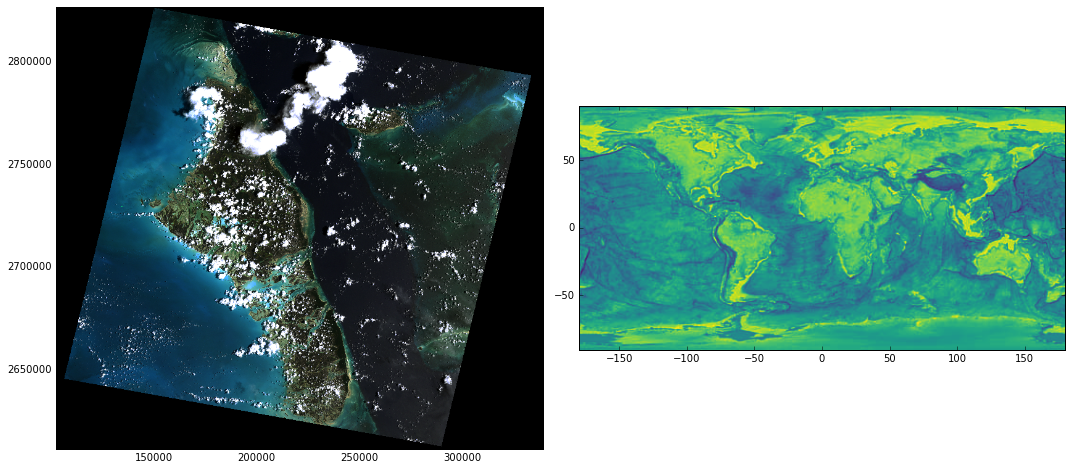

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plot.show(src, ax=ax1)
plot.show((world, 2), cmap='viridis', ax=ax2)
fig.tight_layout()

## Multiple bands side by side

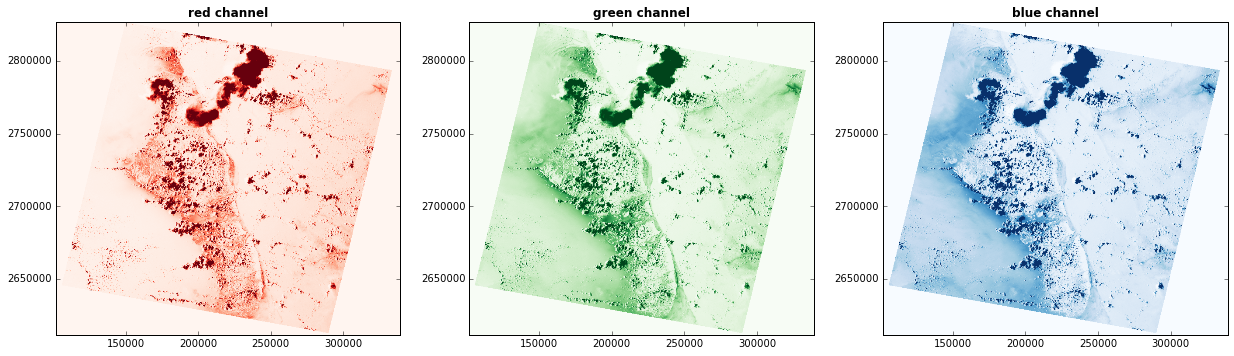

In [6]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
plot.show((src, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((src, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((src, 3), ax=axb, cmap='Blues', title='blue channel')

### How about the same thing but with the ability to navigate simultaneously?

<IPython.core.display.Javascript object>


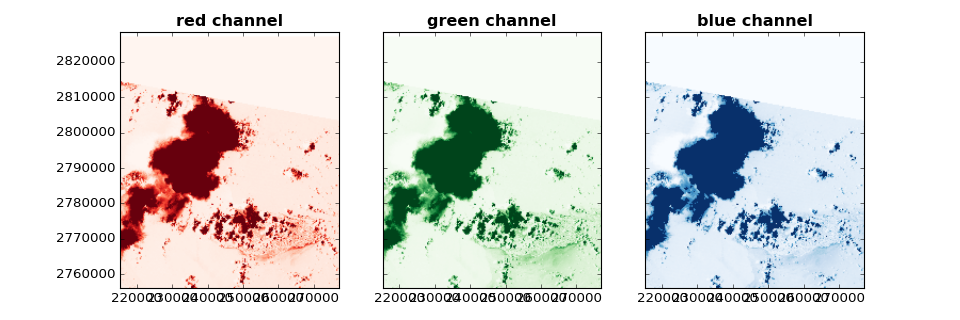

In [7]:
%matplotlib notebook
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(12, 4), sharex=True, sharey=True)
plot.show((src, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((src, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((src, 3), ax=axb, cmap='Blues', title='blue channel')

### If we want to see a histogram of the data we use the plot.show_hist function

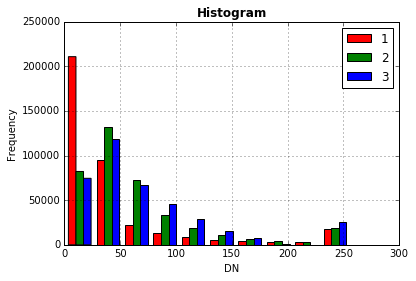

In [8]:
%matplotlib inline
plot.show_hist(src)

### Any of the optional pyplot histogram parameters can be passed to tweak the representation

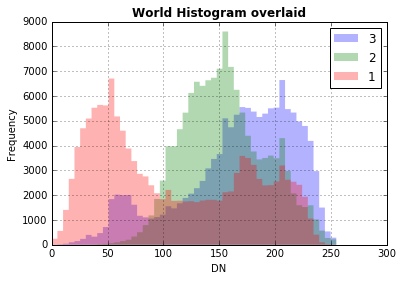

In [9]:
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")

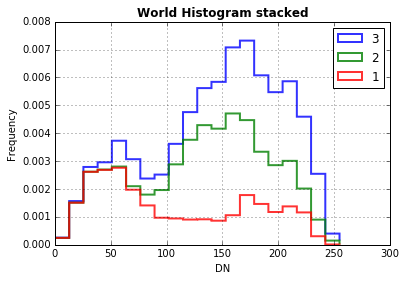

In [10]:
plot.show_hist(world, bins=20, lw=2.0, stacked=True,
               alpha=0.8, histtype='step', normed=True, 
               title="World Histogram stacked")

### See matplotlib.pyplot.hist documentation at http://matplotlib.org/api/pyplot_api.html for a list of these parameters and available options

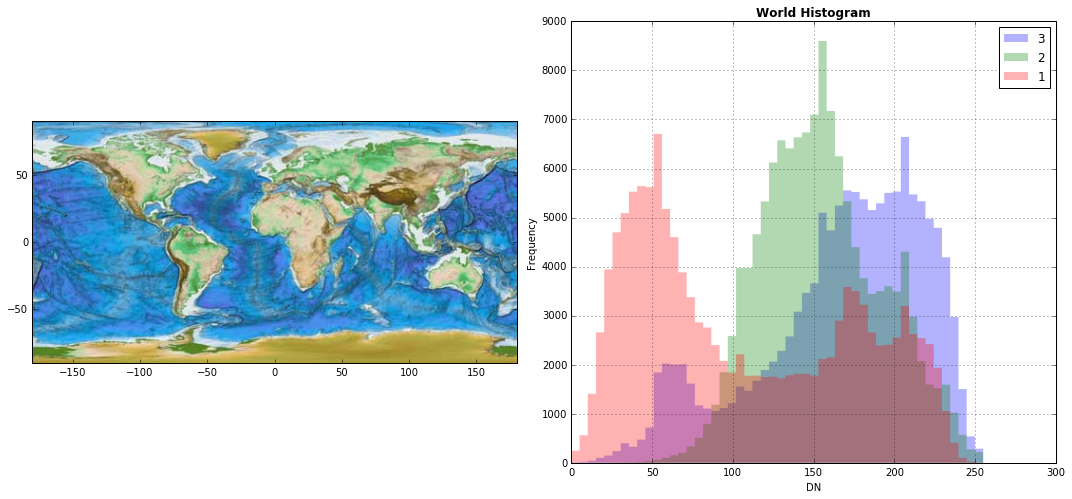

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plot.show(world, ax=ax1)
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram")
fig.tight_layout()

### Show contours from a raster

C:\Anaconda\lib\site-packages\matplotlib\contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


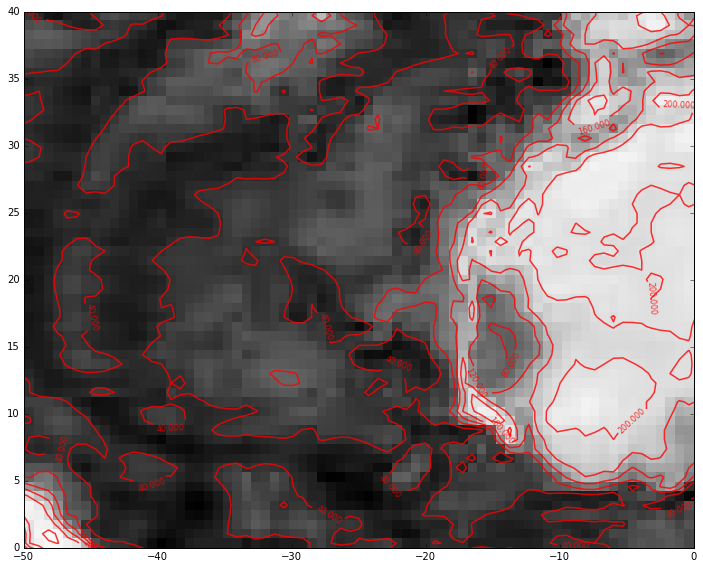

In [13]:
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-50, 0)
ax.set_ylim(0, 40)

plot.show((world, 1), contour=True, ax=ax)

### And of course there are many ways to easily customize this output ...

<IPython.core.display.Javascript object>


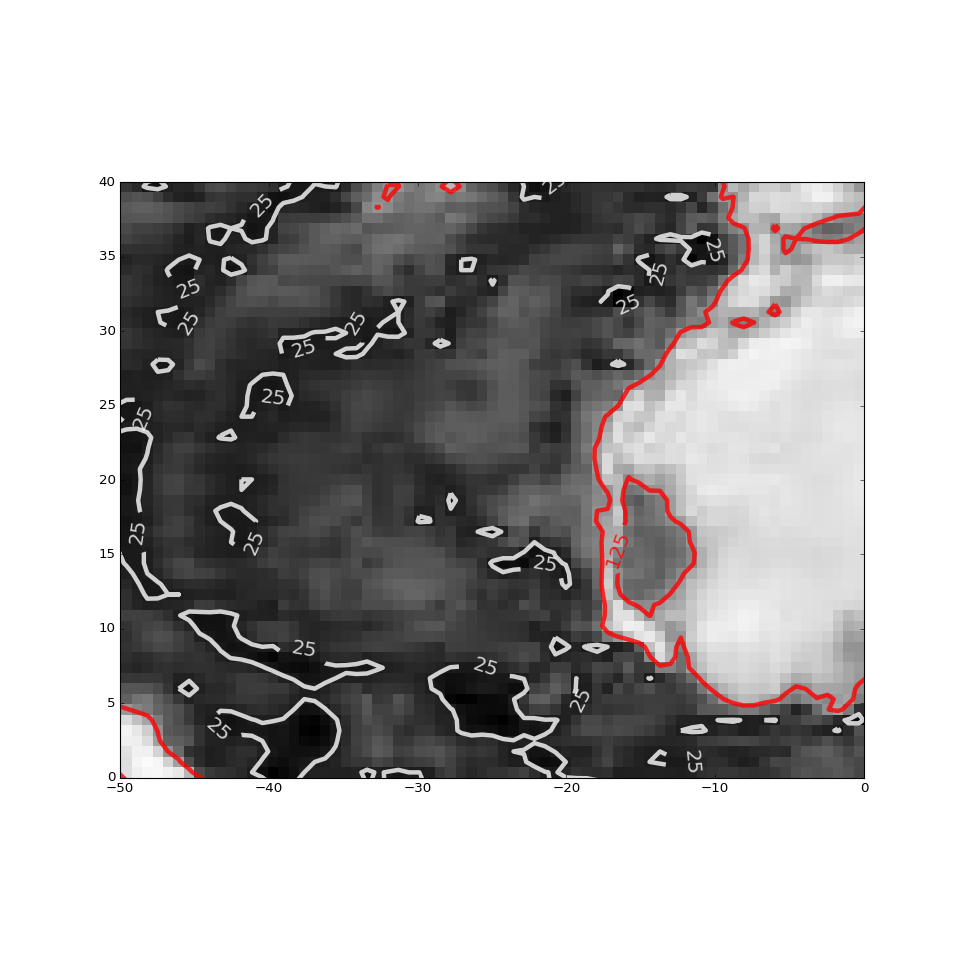

In [21]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-50, 0)
ax.set_ylim(0, 40)

plot.show((world, 1), contour=True, ax=ax, 
          levels=[25, 125], colors=['white', 'red'], linewidths=4,
         contour_label_kws=dict(fontsize=18, fmt="%1.0f", inline_spacing=15, use_clabeltext=True))

# Add a rasterio raster to a cartopy geoaxes

C:\Anaconda\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


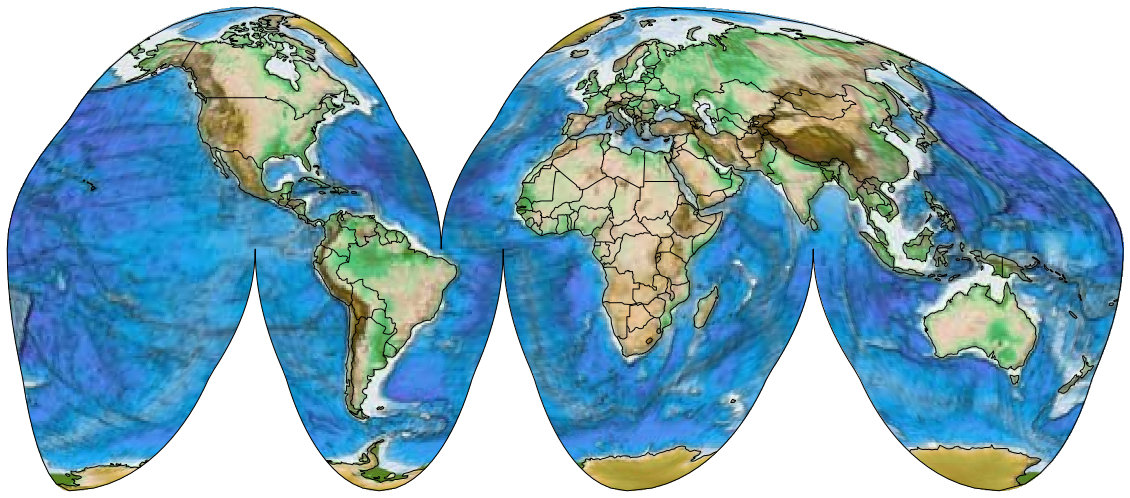

In [12]:
import cartopy
import cartopy.crs as ccrs

fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())

ax.set_global()
plot.show(world, origin='upper', transform=ccrs.PlateCarree(), interpolation=None, ax=ax)

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)